# How to normalize data

data normalization is a data preparation technique that is common in machine learning. Its goal is to transform features to similar scales (change the range of the values) to help improve the performance and training stability of a model.
Note that not every dataset needs to be normalized for machine learning; it’s only needed when the ranges of attributes are different.


Help:
https://www.turing.com/kb/data-normalization-with-python-scikit-learn-tips-tricks-for-data-science





Why normalization is needed prior to model fitting
Data normalization is useful for feature scaling while scaling itself is necessary in machine learning algorithms. This is because certain algorithms are sensitive to scaling. Let’s look at it in more detail.

Distance algorithms like KNN, K-means, and SVM use distances between data points to determine their similarity. They’re most affected by a range of features. Machine learning algorithms like linear regression and logistic regression use gradient descent for optimization techniques that require data to be scaled. Having similar scale features can help the gradient descent converge more quickly towards the minima. On the other hand, tree-based algorithms are not sensitive to the scale of the features. This is because a decision tree only splits a node based on a single feature, and this split is not influenced by other features.

### Normalization techniques in machine learning
The most widely used types of normalization techniques in machine learning are:

Min-max

Z-score

Log scaling

In order to implement the above techniques, the following functions are used to achieve functionality:

The fit(data): This method helps compute the mean and std dev for a given feature, which assists in further scaling.

The transform(data): This supports performing scaling using mean and std dev calculated using the .fit() method.

The fit_transform(): This method performs both fit and transform.

In [10]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler


StandardScaler()

In [11]:

scaler.mean_ , scaler.scale_


(array([1.        , 0.        , 0.33333333]),
 array([0.81649658, 0.81649658, 1.24721913]))

In [12]:

X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

### z - score normalization

$$
z = \frac{x - \mu}{\sigma}

$$

standardization can be helpful in cases where data follows a Gaussian distribution. However, this doesn’t necessarily have to be true. In addition, unlike normalization, standardization doesn’t have a bounding range. This means that even if there are outliers in data, they won’t be affected by standardization

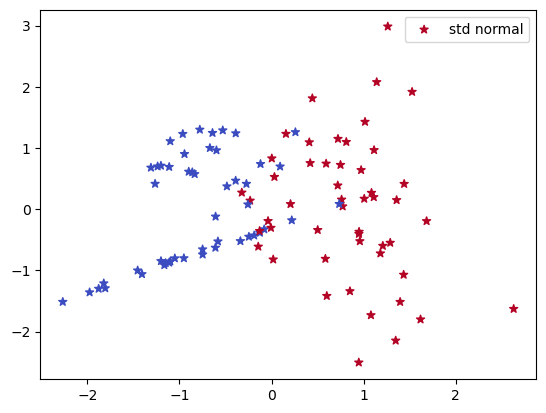

In [1]:
#PREPROCESSING

#- Changing the scale
#- (X - mean)/std

from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, 
                           n_features = 2, 
                           n_redundant = 0, 
                           n_classes = 2, 
                           random_state = 250)

from sklearn import preprocessing
import matplotlib.pyplot as plt

# from sklearn.preprocessing import StandardScaler
# transform X to standard normally distributed data
X_std = preprocessing.StandardScaler().fit_transform(X)

plt.scatter(X_std[:,0], X_std[:,1], c = y, cmap = 'coolwarm', marker = '*', label = 'std normal')
plt.legend()

In [3]:
y

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [2]:
X_std

array([[ 1.28814988e+00, -5.48853030e-01],
       [-3.38367723e-01, -5.21556721e-01],
       [-1.11222549e+00, -8.73003909e-01],
       [ 8.50881520e-01, -1.33985312e+00],
       [ 3.12067709e-02,  5.27272336e-01],
       [-1.20065813e+00,  7.11038330e-01],
       [ 1.39576757e+00, -1.51512109e+00],
       [ 5.99702844e-01, -1.41738594e+00],
       [ 1.20773269e+00, -5.98474035e-01],
       [-7.97084875e-02, -3.28584484e-01],
       [-6.75802146e-03, -3.04440505e-01],
       [-1.88625030e-01, -4.28888489e-01],
       [-6.69398042e-01,  1.00012100e+00],
       [-9.63843504e-01,  1.22977184e+00],
       [ 7.60218826e-01,  1.57133283e-01],
       [ 4.19306911e-01,  7.53568976e-01],
       [-1.09933727e+00, -8.52534891e-01],
       [ 9.46934353e-01, -2.50510087e+00],
       [-3.88883772e-01,  1.24010167e+00],
       [ 2.05677195e-01,  8.37565205e-02],
       [ 1.52559323e+00,  1.91721145e+00],
       [-1.20062734e+00, -8.47660665e-01],
       [-2.32561653e-01,  1.39934899e-01],
       [-3.

### min-max scaling
Min-max is a scaling technique where values are rescaled and shifted so that they range between 0 and 1 or between -1 and 1.

$$

x' = \frac{x - min(x)}{max(x) - min(x)}

$$

Min-max normalization is preferred when data doesn’t follow Gaussian or normal distribution. It’s favored for normalizing algorithms that don’t follow any distribution, such as KNN and neural networks. Note that normalization is affected by outliers.

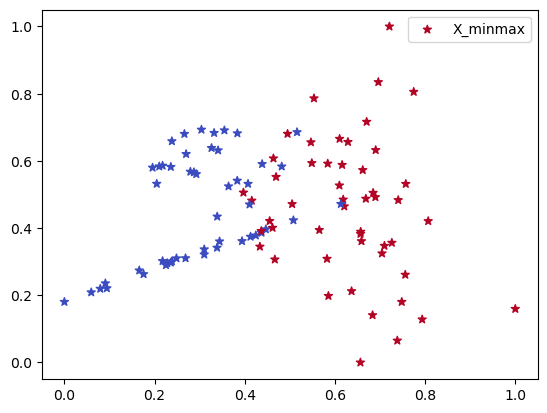

In [4]:
# tranform X to the range of (0,1)
X_minmax = preprocessing.MinMaxScaler().fit_transform(X)

plt.scatter(X_minmax[:,0], X_minmax[:,1], c = y, cmap = 'coolwarm', marker = '*', label = 'X_minmax')
plt.legend()

### Log Scaling

$x' = log(x)$

Log scaling is preferable if a dataset holds huge outliers.

In [5]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

transformer = FunctionTransformer(np.log1p)
t1 = transformer.transform(X)
print(t1)

[[ 9.88657400e-01 -1.59739701e+00]
 [-5.64297604e-01 -1.42974853e+00]
 [            nan             nan]
 [ 7.50469530e-01             nan]
 [ 4.89845436e-02  5.06209385e-01]
 [            nan  6.45910618e-01]
 [ 1.03950510e+00             nan]
 [ 5.82653420e-01             nan]
 [ 9.48898934e-01 -2.00056220e+00]
 [-9.90307751e-02 -6.92022185e-01]
 [ 7.47111998e-04 -6.28779150e-01]
 [-2.69410975e-01 -1.00841058e+00]
 [-1.98393957e+00  8.32476641e-01]
 [            nan  9.59290755e-01]
 [ 6.93091165e-01  1.46691241e-01]
 [ 4.41978371e-01  6.75639791e-01]
 [            nan             nan]
 [ 8.07868757e-01             nan]
 [-6.87260033e-01  9.64633757e-01]
 [ 2.44894635e-01  5.70216394e-02]
 [ 1.09759212e+00  1.26421568e+00]
 [            nan             nan]
 [-3.47300384e-01  1.26384020e-01]
 [-5.29882918e-01  2.72120994e-01]
 [ 1.22415223e-01  6.36444481e-01]
 [-1.38162884e+00 -1.45877054e+00]
 [            nan  4.10012734e-01]
 [-1.52372094e+00 -2.45876306e-01]
 [            nan   

c:\Users\lionel\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:312: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


$$

||x||_1 = \sum |x| \\

||x||_2^2 = \sum x_i^2
$$

Parameters:
norm
{‘l1’, ‘l2’, ‘max’}, default=’l2’
The norm to use to normalize each non zero sample. If norm=’max’ is used, values will be rescaled by the maximum of the absolute values.

copy
bool, default=True
Set to False to perform inplace row normalization and avoid a copy (if the input is already a numpy array or a scipy.sparse CSR matrix).

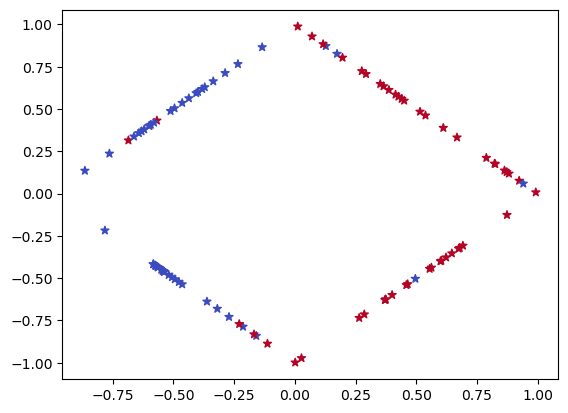

In [6]:
# transform X to unit L1-norm (diamond for 2d)
X_L1 = preprocessing.Normalizer(norm = 'l1').transform(X)

# transform X to unit L2-norm (circle for 2d)
X_L2 = preprocessing.Normalizer(norm = 'l2').transform(X)


plt.scatter(X_L1[:,0], X_L1[:,1], c = y, cmap = 'coolwarm', marker = '*', label = 'X_L1')

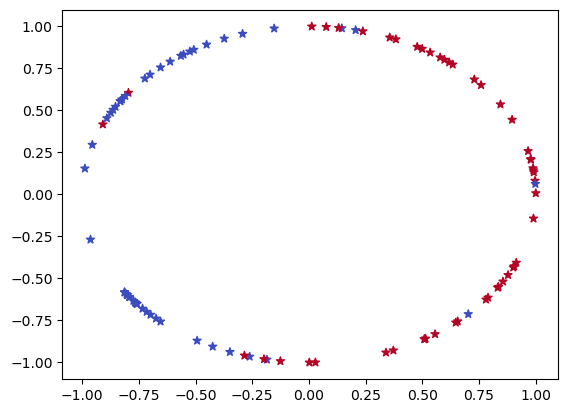

In [7]:
plt.scatter(X_L2[:,0], X_L2[:,1], c = y, cmap = 'coolwarm', marker = '*', label = 'X_L2')

### feature binarizer

In [8]:
# transform X to binary - only 1 and 0
X_bin = preprocessing.Binarizer().fit_transform(X)
X_bin


array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.

In [9]:
# transform X to categorical feature according to bin [-1,0,1]

# Return the indices of the bins to which each value in input array belongs to
# If range is [-1,0,1] we have 4 bins -> (-1< ,between -1 and 0, between 0 and 1, >1)
# Give the indices from (0,1,2,3)

X_digit = np.digitize(X, [-1,0,1])
X_digit

array([[3, 1],
       [1, 1],
       [0, 0],
       [3, 0],
       [2, 2],
       [0, 2],
       [3, 0],
       [2, 0],
       [3, 1],
       [1, 1],
       [2, 1],
       [1, 1],
       [1, 3],
       [0, 3],
       [2, 2],
       [2, 2],
       [0, 0],
       [3, 0],
       [1, 3],
       [2, 2],
       [3, 3],
       [0, 0],
       [1, 2],
       [1, 2],
       [2, 2],
       [1, 1],
       [0, 2],
       [1, 1],
       [0, 0],
       [1, 3],
       [3, 3],
       [0, 0],
       [2, 3],
       [2, 1],
       [1, 2],
       [0, 0],
       [1, 2],
       [3, 3],
       [3, 2],
       [0, 0],
       [2, 2],
       [0, 0],
       [0, 0],
       [0, 2],
       [0, 0],
       [2, 1],
       [2, 3],
       [3, 2],
       [1, 3],
       [0, 3],
       [3, 0],
       [2, 3],
       [1, 1],
       [2, 3],
       [2, 2],
       [3, 0],
       [2, 2],
       [3, 1],
       [0, 0],
       [1, 1],
       [0, 3],
       [3, 2],
       [3, 0],
       [3, 0],
       [3, 0],
       [2, 0],
       [0,